loadDataSet:

   引入原始数据集，每个样本有2个属性(x1,x2),标签为0或1

plotDataSet:

   根据原始数据集打印散点图

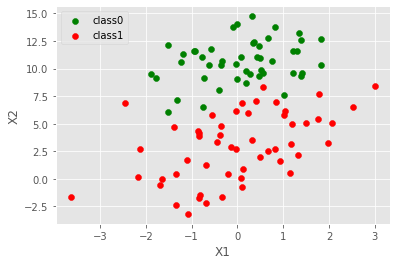

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def loadDataSet():
    dataMat=[];labelMat=[]
    with open('testSet.txt') as f:
        for line in f:
            line=line.strip().split()
            dataMat.append([1.0,float(line[0]),float(line[1])])
            labelMat.append(int(line[-1]))
    return dataMat,labelMat
def plotDataSet():
    dataMat,labelMat=loadDataSet()
    x0_set=[];y0_set=[];x1_set=[];y1_set=[]
    for i in range(len(dataMat)):
        if(labelMat[i]):
            x1_set.append(dataMat[i][1]);y1_set.append(dataMat[i][2])
        else:
            x0_set.append(dataMat[i][1]);y0_set.append(dataMat[i][2])
    fig,ax=plt.subplots()
    ax.scatter(x0_set,y0_set,color='green',label='class0')
    ax.scatter(x1_set,y1_set,color='red',label='class1')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    return fig,ax
plotDataSet()
dataMat,labelMat=loadDataSet()

gradAscent:

梯度下降拟合参数weights

plotfit:

根据参数weights画出边界线

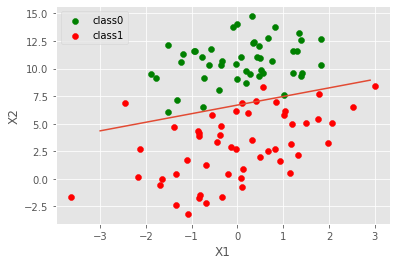

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


In [2]:
import numpy as np
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
def gradAscent(dataMatIn,labelMatIn):
    # dataMat为m*n的样本矩阵
    # labelMat为m*1的标签矩阵
    dataMat=np.mat(dataMatIn) 
    labelMat=np.mat(labelMatIn).transpose()  
    alpha=0.001
    maxCycles=500
    # weights(代求参数)初始化为n*1的矩阵
    weights=np.ones((dataMat.shape[1],1))
    # 进行maxCycles次迭代
    for i in range(maxCycles):
        # h为m*1矩阵,每行表示h(x)
        h=sigmoid(dataMat*weights)
        error=labelMat-h
        weights=weights+alpha*dataMat.transpose()*error
    # 将weights转换为array返回
    return weights.getA()
def plotfit(weights):
    fig,ax=plotDataSet()
    x=np.arange(-3,3,0.1)
    y=(-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.show()
weights=gradAscent(dataMat,labelMat)
plotfit(weights)
print(weights)

stoGradAscent:

采用随机梯度下降提高运行效率

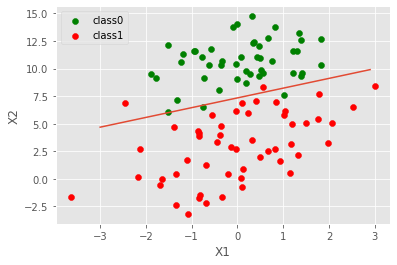

In [3]:
import random
def stocGradAscent(dataMat,labelMat,maxCycles=10):
    m,n=np.shape(dataMat)
    weights=np.ones(n)
    for i in range(maxCycles):
        # 创建一个用于随机选取的列表
        dataIndex=list(range(m))
        for j in range(m):
            alpha=4/(1.0+j+i)+0.01
            # 随机选取一个样本
            randindex=int(random.uniform(0,len(dataIndex)))
            h=sigmoid(sum(dataMat[randindex]*weights))
            error=labelMat[randindex]-h
            weights=weights+alpha*error*dataMat[randindex]
            # 删除选取的样本序号
            del(dataIndex[randindex])
    return weights
weights=stocGradAscent(np.array(dataMat),labelMat,10)
plotfit(weights)

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
def loadData(filename):
    df=pd.read_csv(filename,header=None,delimiter="\s+")
    df=df.replace('?',0.0)
    x=df.iloc[:,np.r_[0:2,3:26]]
    y=df.iloc[:,-1]
    ss=StandardScaler()
    x=ss.fit_transform(x)
    return x,y
x_train,y_train=loadData('horse-colic.data')
x_test,y_test=loadData('horse-colic.test')
classifier=LogisticRegression(solver='liblinear',max_iter=500).fit(x_train,y_train)
test_accury=classifier.score(x_test,y_test)
print(f'准确率为{test_accury}')

准确率为0.8382352941176471
